In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
samp_rate = 8e6 # 8MSps
clock_period = 0.0005 # 0.5 ms

In [8]:
low = [0] * int(samp_rate * clock_period)
high = [0.95] * int(samp_rate * clock_period)

long = 3 * high + low
short = high + low

In [9]:
cmd_forward         = 4 * long + 40 * short
cmd_forward_right   = 4 * long + 46 * short
cmd_forward_left    = 4 * long + 52 * short
cmd_reverse         = 4 * long + 10 * short
cmd_reverse_right   = 4 * long + 34 * short
cmd_reverse_left    = 4 * long + 28 * short
cmd_left            = 4 * long + 58 * short
cmd_right           = 4 * long + 64 * short

cmd_stop    = 15 * (4 * long + 4 * short)

Text(0.5, 1.0, 'STOP')

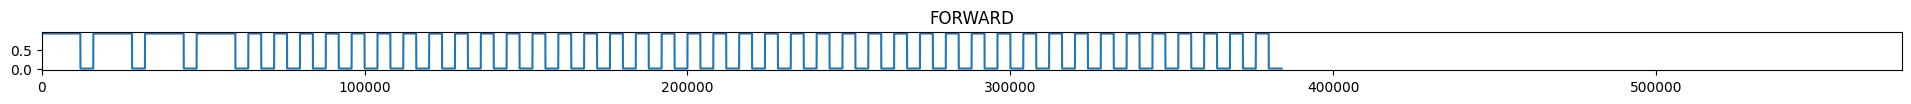

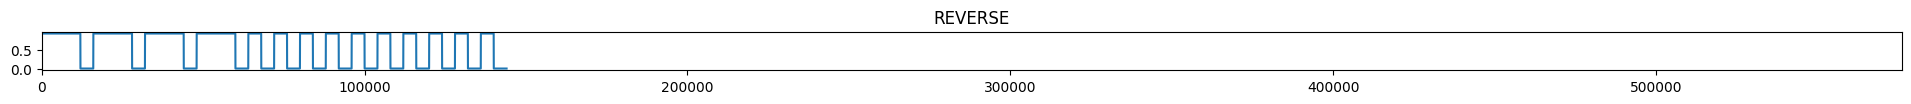

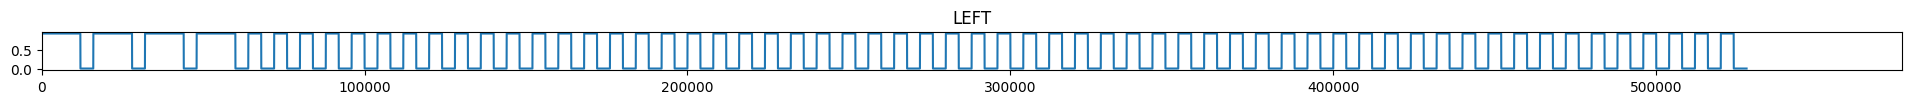

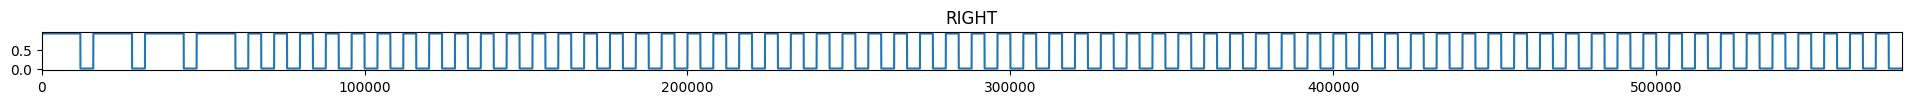

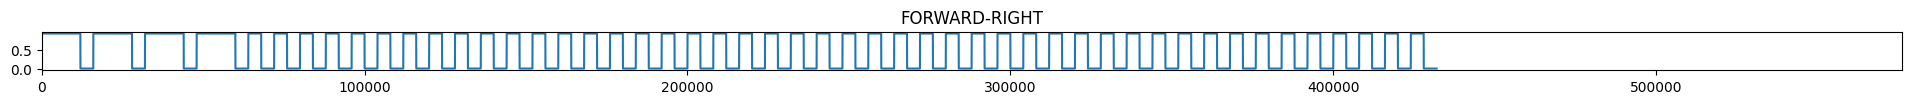

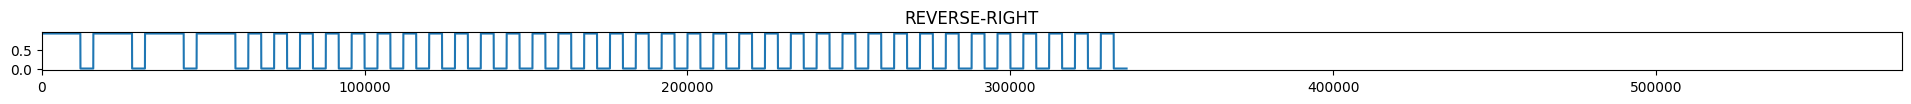

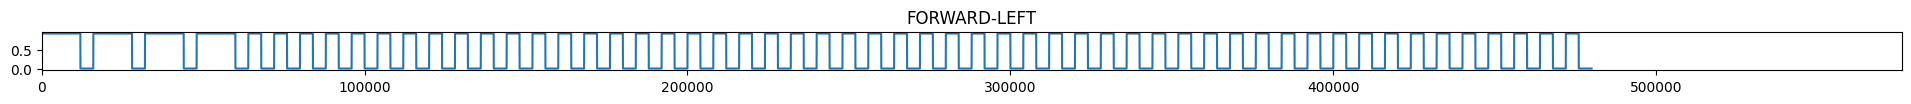

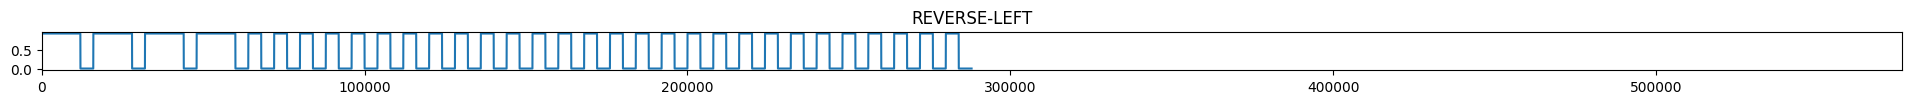

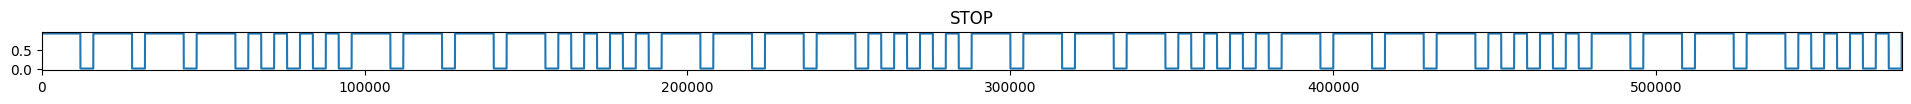

In [10]:
figsize = (24,0.5)
plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_forward)
plt.title("FORWARD")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_reverse)
plt.title("REVERSE")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_left)
plt.title("LEFT")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_right)
plt.title("RIGHT")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_forward_right)
plt.title("FORWARD-RIGHT")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_reverse_right)
plt.title("REVERSE-RIGHT")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_forward_left)
plt.title("FORWARD-LEFT")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_reverse_left)
plt.title("REVERSE-LEFT")

plt.figure(figsize=figsize)
plt.xlim((0,len(cmd_right)))
plt.plot(cmd_stop)
plt.title("STOP")

In [ ]:
# Let's create a sequence where we wait two seconds, go forward for two seconds, then stop
# Two seconds in 16M samples, and each forward command takes
t_forward = 2
wait_time = int(2 * samp_rate) * [0]
num_cmds = int(np.floor((t_forward * samp_rate) / len(cmd_forward)))
full_cmd = num_cmds * cmd_forward + cmd_stop + wait_time

# The signal should have an 8 MHz bandwidth and the control signal should live at +2MHz
f_mod = 2e6
t = np.arange(len(full_cmd)) / samp_rate
mod_cmd = np.exp(1j*2*np.pi*t*f_mod) * full_cmd

(0.0, 384000.0)

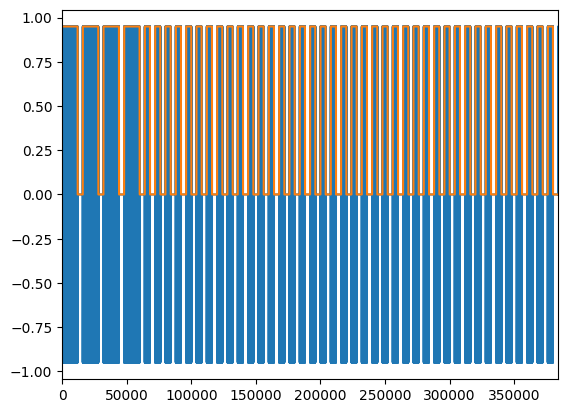

In [15]:
plt.plot(mod_cmd)
plt.plot(cmd_forward)
plt.xlim((0,len(cmd_forward)))

In [16]:
# The output file should be readable by GNURadio
output = np.zeros(2*len(mod_cmd))
output[0::2] = np.real(mod_cmd).astype(np.float32)
output[1::2] = np.imag(mod_cmd).astype(np.float32)

with open("output.data", "wb") as f:
    f.write(output.astype(np.float32))